Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler

Loading Image-data

In [2]:
x_np = np.load('X.npy')
y_np = np.load('Y.npy')

print(f'Shape of X.npy = {x_np.shape}\nShape of Y.npy = {y_np.shape}')

Shape of X.npy = (2062, 64, 64)
Shape of Y.npy = (2062, 10)


Data preprocessing for detecting zeros and ones in the image dataset

According to description of data Image of zeros exist between 204-409, Image of ones exist between 822-1027


In [3]:
x = np.concatenate((x_np[204:409],x_np[822:1027]),axis=0)
x = x.reshape(x.shape[0],x.shape[1]*x.shape[2])
print(f'Shape of X : {x.shape}')

Shape of X : (410, 4096)


In [4]:
ones = np.ones(205)
zeros = np.zeros(205)

y = np.concatenate((zeros,ones),axis=0).reshape(x.shape[0],1)
print(f'Shape of Y : {y.shape}')

Shape of Y : (410, 1)


Data seems ready for the LogisticRegression
Let's look on plot how our image looks

(-0.5, 63.5, 63.5, -0.5)

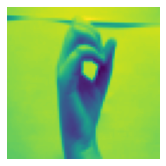

In [5]:
plt.subplot(1,2,1)
plt.imshow(x_np[206])
plt.axis('off')

Test train split

In [6]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

print(f'X_Train and Y_Train shapes : {xtrain.shape} {ytrain.shape}\nX_Test and Y_Test shapes : {xtest.shape} {ytest.shape}')

X_Train and Y_Train shapes : (328, 4096) (328, 1)
X_Test and Y_Test shapes : (82, 4096) (82, 1)


Building Logistic Regression Model

In [7]:
logistic_model = LogisticRegression().fit(xtrain,ytrain)

print(f'Train Acc Score : {accuracy_score(ytrain,logistic_model.predict(xtrain))}\nTest Acc Score : {accuracy_score(ytest,logistic_model.predict(xtest))}')

C:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Acc Score : 1.0
Test Acc Score : 0.975609756097561


C:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Lets Build MLPClassifier Model

Scaling X

In [8]:
scaler = StandardScaler()
scaler.fit(xtrain,ytrain)
x_scaled_train = scaler.transform(xtrain)
x_scaled_test = scaler.transform(xtest)


In [9]:
mlp_model = MLPClassifier().fit(x_scaled_train,ytrain)

print(f'Train Acc Score : {accuracy_score(ytrain,mlp_model.predict(x_scaled_train))}\nTest Acc Score : {accuracy_score(ytest,mlp_model.predict(x_scaled_test))}')

C:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Acc Score : 1.0
Test Acc Score : 0.975609756097561


Optimizing MLPClassifier


In [10]:
mlp = MLPClassifier()
params = {
    'hidden_layer_sizes':[(10,10,10),
                        (100,100,100),
                        (100,100),],
} #Testing parameters 
cv_model = GridSearchCV(mlp,params,cv=5,verbose=2,n_jobs=-1)


In [11]:
cv_model.fit(x_scaled_train,ytrain)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100)]},
             verbose=2)

In [12]:
cv_model.best_params_

{'hidden_layer_sizes': (100, 100, 100)}

In [13]:
tuned_mlp_model = MLPClassifier(hidden_layer_sizes=(100,100,100))
tuned_mlp_model.fit(x_scaled_train,ytrain)

print(f'Tuned Model Test Acc Score : {accuracy_score(ytest,tuned_mlp_model.predict(x_scaled_test))}')

C:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuned Model Test Acc Score : 0.975609756097561


Let's also check probabilities

In [14]:
Probs = tuned_mlp_model.predict_proba(x_scaled_test)
Probs.shape

(82, 2)

Probability of 0 : 0.00000000
Probability of 1 : 1.0


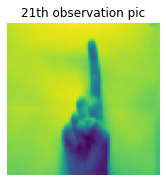

In [15]:
plt.subplot(1,2,1)
plt.imshow(xtest[21].reshape(64,64))
plt.axis('off')
plt.title('21th observation pic')
print(f'Probability of 0 : {Probs[21][0]:.8f}\nProbability of 1 : {Probs[21][1]}')